# Kwanza Tukule Data Analyst Assessment

## Introduction

This notebook presents the analysis and insights derived from the anonymized sales dataset provided by Kwanza Tukule. The assessment involves evaluating technical, analytical, and problem-solving skills through various tasks such as data cleaning, exploratory analysis, advanced analysis, and visualization. 

### Objectives:
1. Perform data cleaning and preparation to ensure the dataset is ready for analysis.
2. Conduct exploratory data analysis (EDA) to uncover patterns and trends in sales performance.
3. Perform advanced analyses, including customer segmentation, forecasting, and anomaly detection.
4. Provide strategic insights and actionable recommendations based on the analysis.
5. Develop a dashboard summarizing key findings to aid decision-making.

### Tools and Technologies:
- **Python**: For data cleaning, analysis, and visualizations.
- **Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Plotly, and Scikit-learn.
- **Jupyter Notebook**: For interactive and well-documented analysis.

The following sections will detail the approach and findings for each task outlined in the assessment instructions.


## **Section 1: Data Cleaning and Preparation (20 points)**


In [30]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
# Load the data
df = pd.read_excel('./Case Study Data - Read Only.xlsx')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display the number of rows and columns in the dataset
print("\nNumber of Rows and Columns in the Dataset:")
print(df.shape)

# Display the column names in the dataset
print("\nColumn Names in the Dataset:")
print(df.columns)

# Check for basic information and data types
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Dataset Preview:
                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1       850.0  
1       Business-de42       Location-1ba8         2      1910.0  
2       Business-de42       Location-1ba8         1      3670.0  
3       Business-de42       Location-1ba8         1      2605.0  
4       Business-de42       Location-1ba8         5      1480.0  

Number of Rows and Columns in the Dataset:
(333405, 7)

Column Names in the Dataset:
Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QU

From the inspection:
1. Missing Values are found in the UNIT PRICE column having 8 missing values.
2. There are 3,524 duplicate rows in the dataset.


In [3]:

print(df['UNIT PRICE'].describe())

count    333397.000000
mean       2322.039538
std        1585.256624
min           0.000000
25%        1420.000000
50%        1840.000000
75%        2755.000000
max       16136.000000
Name: UNIT PRICE, dtype: float64


Since the missing values account for only 8 rows out of 333,405 (0.0024%), filling them with the mean is a more reasonable approach. This ensures continuity in the column for analysis. Additionally, given the size of the dataset, the mean serves as a reliable central value without significantly affecting the overall distribution.

For the duplicate rows, we will proceed to drop them to ensure data quality and avoid redundancy.



In [4]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Duplicates removed. Remaining rows: {df.shape[0]}")

# Handle missing values in 'UNIT PRICE'
# Option 1: Replace missing values with the mean of the column
mean_unit_price = df['UNIT PRICE'].mean()
df['UNIT PRICE'] = df['UNIT PRICE'].fillna(mean_unit_price)

# Option 2: Drop rows with missing values (uncomment if preferred)
# df = df.dropna(subset=['UNIT PRICE'])

print(f"Missing values in 'UNIT PRICE' handled. Remaining missing values: {df['UNIT PRICE'].isnull().sum()}")

Duplicates removed. Remaining rows: 329881
Missing values in 'UNIT PRICE' handled. Remaining missing values: 0


### Data Quality Assessment

1. **Missing Values**:  
   - The **'UNIT PRICE'** column had 8 missing values.
   - **Action Taken**: These missing values were filled with the **mean** of the column, as the dataset is large and the mean is a reliable central value.

2. **Duplicate Rows**:  
   - There were **3,524 duplicate rows** in the dataset.
   - **Action Taken**: The duplicate rows were removed, reducing the dataset to **329,881 rows**.

3. **Remaining Issues**:  
   - After handling the missing values and removing duplicates, there are **no remaining missing values** in the dataset.


Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column.

In [5]:
# Create a 'Month-Year' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Display the first few rows to verify
print("\nDataset with 'Month-Year' column added:")
print(df[['DATE', 'Month-Year']].head())



Dataset with 'Month-Year' column added:
                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [6]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024


In [7]:
# Filtering for another month, the month of September 2024, for example
df_september = df[df['Month-Year'] == 'September 2024']

# Display the first few rows of September 2024
print(df_september.head())

                  DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
17 2024-09-06 08:42:00         Category-75       Product-6aa1   
18 2024-09-06 08:42:00         Category-76       Product-c570   
19 2024-09-06 08:42:00        Category-100       Product-f3ee   
21 2024-09-05 19:48:00        Category-120       Product-14f3   
22 2024-09-05 19:48:00        Category-120       Product-9a3e   

   ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  \
17       Business-f13b       Location-bb69         1      2255.0   
18       Business-f13b       Location-bb69         1      2540.0   
19       Business-f13b       Location-bb69         1      1880.0   
21       Business-5d3e       Location-1979         5      1740.0   
22       Business-5d3e       Location-1979         5      1695.0   

        Month-Year  
17  September 2024  
18  September 2024  
19  September 2024  
21  September 2024  
22  September 2024  


## **Section 2: Exploratory Data Analysis (30 points)**

### 1. **Sales Overview:**

We'll calculate the total **Quantity** and **Value** (Quantity × Unit Price) grouped by:
- **Anonymized Category**
- **Anonymized Business**

In [8]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year'],
      dtype='object')

In [9]:
# Calculate the total Quantity and Value grouped by Anonymized Category
df['VALUE'] = df['QUANTITY'] * df['UNIT PRICE']  # Calculate Value

category_sales = df.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'VALUE']].sum().reset_index()

# Calculate the total Quantity and Value grouped by Anonymized Business
business_sales = df.groupby('ANONYMIZED BUSINESS')[['QUANTITY', 'VALUE']].sum().reset_index()

# Display the top 5 categories and businesses
print("Sales by Anonymized Category:")
print(category_sales.head())

print("\nSales by Anonymized Business:")
print(business_sales.head())


Sales by Anonymized Category:
  ANONYMIZED CATEGORY  QUANTITY         VALUE
0        Category-100     76824  1.349028e+08
1        Category-101     19585  3.562652e+07
2        Category-102      1786  4.644630e+05
3        Category-104      1217  1.557598e+06
4        Category-105      1579  2.690719e+06

Sales by Anonymized Business:
  ANONYMIZED BUSINESS  QUANTITY     VALUE
0       Business-0000         8   10445.0
1       Business-0005         1    2645.0
2       Business-0029        26   77340.0
3       Business-003d        98  221761.0
4       Business-0072       127  225056.0


In [10]:
category_sales['ANONYMIZED CATEGORY'].unique()

array(['Category-100', 'Category-101', 'Category-102', 'Category-104',
       'Category-105', 'Category-106', 'Category-107', 'Category-108',
       'Category-109', 'Category-110', 'Category-111', 'Category-113',
       'Category-114', 'Category-115', 'Category-116', 'Category-117',
       'Category-118', 'Category-119', 'Category-120', 'Category-121',
       'Category-122', 'Category-123', 'Category-124', 'Category-125',
       'Category-74', 'Category-75', 'Category-76', 'Category-77',
       'Category-78', 'Category-79', 'Category-81', 'Category-82',
       'Category-83', 'Category-84', 'Category-85', 'Category-86',
       'Category-89', 'Category-90', 'Category-91', 'Category-92',
       'Category-94', 'Category-95', 'Category-96', 'Category-97',
       'Category-98', 'Category-99'], dtype=object)

In [11]:
business_sales['ANONYMIZED BUSINESS'].unique()

array(['Business-0000', 'Business-0005', 'Business-0029', ...,
       'Business-ffb1', 'Business-ffd2', 'Business-ffff'], dtype=object)

Visualizations (e.g., bar charts or tables) to support the findings.

In [12]:
print(df.isnull().sum())

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
Month-Year             0
VALUE                  0
dtype: int64


In [13]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE'],
      dtype='object')

In [14]:
business_sales.head()

,ANONYMIZED BUSINESS,QUANTITY,VALUE
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,77340.0
3,Business-003d,98,221761.0
4,Business-0072,127,225056.0


In [15]:
category_sales.head()

,ANONYMIZED CATEGORY,QUANTITY,VALUE
0,Category-100,76824,1.349028e+08
1,Category-101,19585,3.562652e+07
2,Category-102,1786,4.644630e+05
3,Category-104,1217,1.557598e+06
4,Category-105,1579,2.690719e+06


Display top 10 categories/businesses by value and quantity

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\3688633967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


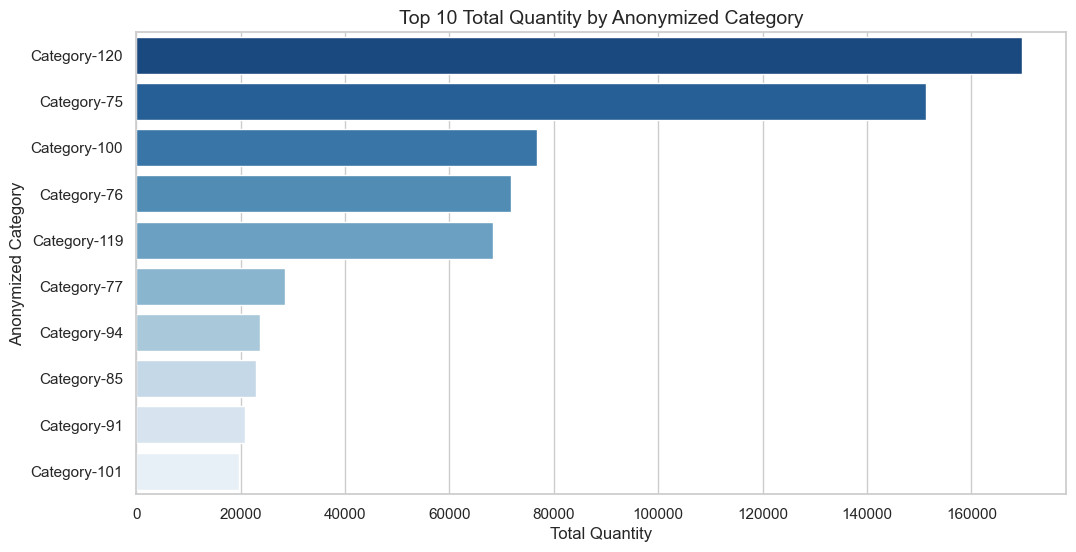

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\3688633967.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


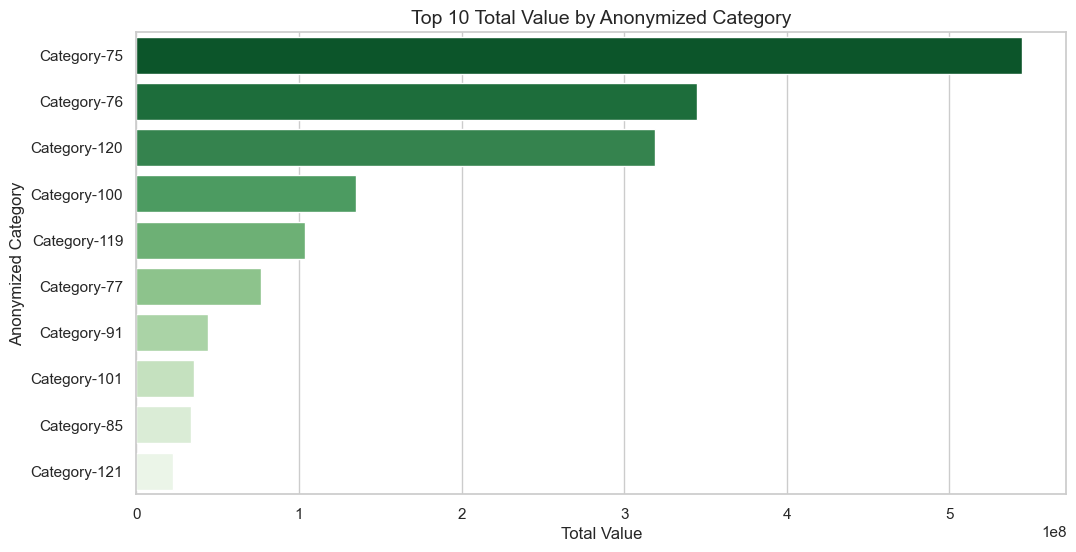

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\3688633967.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


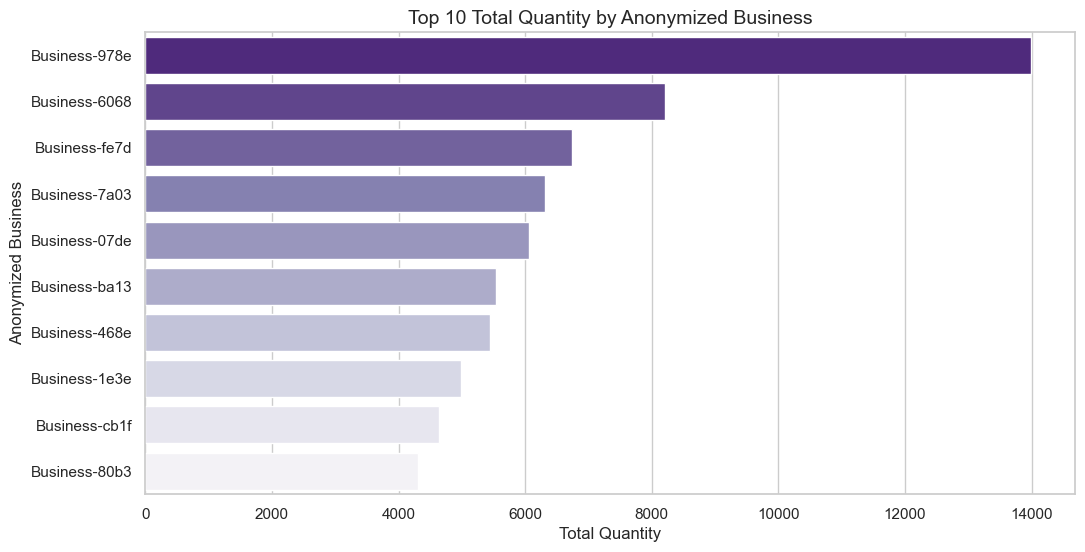

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\3688633967.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


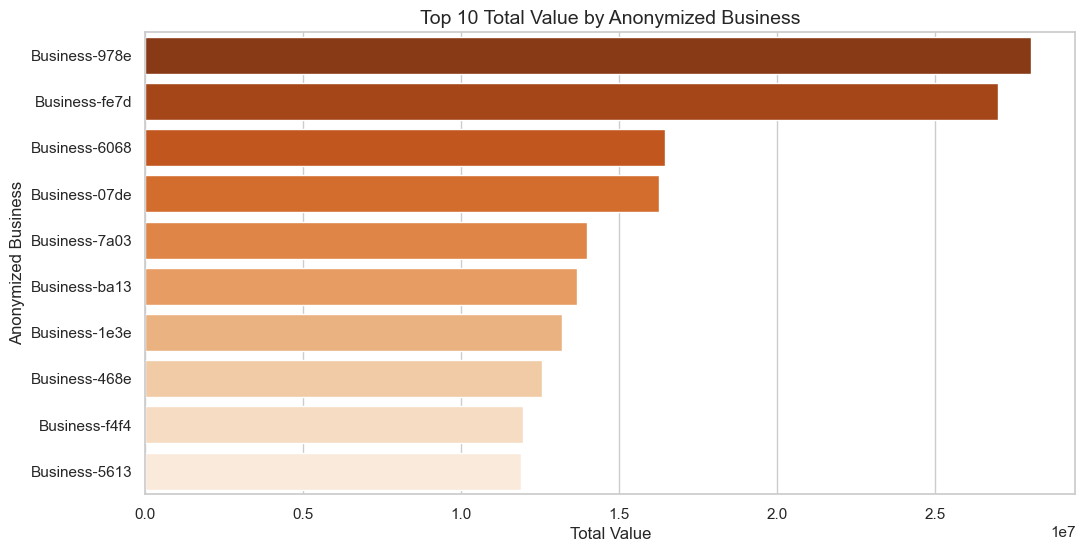

In [16]:
# Set a style for the plots
sns.set_theme(style="whitegrid")

# Define the number of top categories/businesses to display
top_n = 10

# Filter for top categories by Quantity and Value
top_categories_quantity = category_sales.nlargest(top_n, 'QUANTITY')
top_categories_value = category_sales.nlargest(top_n, 'VALUE')

# Bar chart for Top N Total Quantity by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED CATEGORY', 
    data=top_categories_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Blues_r'
)
plt.title(f'Top {top_n} Total Quantity by Anonymized Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')
plt.show()

# Bar chart for Top N Total Value by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED CATEGORY', 
    data=top_categories_value.sort_values('VALUE', ascending=False), 
    palette='Greens_r'
)
plt.title(f'Top {top_n} Total Value by Anonymized Category', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')
plt.show()

# Filter for top businesses by Quantity and Value
top_businesses_quantity = business_sales.nlargest(top_n, 'QUANTITY')
top_businesses_value = business_sales.nlargest(top_n, 'VALUE')

# Bar chart for Top N Total Quantity by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED BUSINESS', 
    data=top_businesses_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Purples_r'
)
plt.title(f'Top {top_n} Total Quantity by Anonymized Business', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')
plt.show()

# Bar chart for Top N Total Value by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED BUSINESS', 
    data=top_businesses_value.sort_values('VALUE', ascending=False), 
    palette='Oranges_r'
)
plt.title(f'Top {top_n} Total Value by Anonymized Business', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')
plt.show()


## Interpretation of Top 10 Categories and Businesses

### Top 10 Total Quantity by Anonymized Category
From the visualization:
- **Category-120** is the most dominant in terms of total quantity, highlighting its significant role in overall sales volume.  
- **Category-101** ranks lowest among the top 10, indicating a much smaller contribution compared to the leading categories.  
- A **notable drop in quantity** is observed between **Category-119** and **Category-77**, which could suggest differences in classification or demand patterns. This may require further analysis to understand the underlying cause.  

---

### Top 10 Total Value by Anonymized Category
From the visualization:
- **Category-75** stands out as the leader in terms of total value, emphasizing its strong economic or market significance.  
- **Category-121** records the lowest total value among the top 10, reflecting its comparatively smaller revenue contribution.  
- A **significant drop in value** occurs between **Category-76** and **Category-120**, which may indicate a disparity in the pricing, product quality, or target market of these categories.  

---

### Top 10 Total Quantity by Anonymized Business
From the visualization:
- **Business-978e** leads substantially in terms of total quantity, demonstrating its dominance in product distribution or sales volume.  
- **Business-80b3** is at the bottom of the top 10 list, indicating a relatively lower quantity contribution.  

---

### Top 10 Total Value by Anonymized Business
From the visualization:
- **Business-978e** also dominates in terms of total value, solidifying its position as a significant contributor to overall sales performance.  
- **Business-5613** records the lowest total value among the top 10, reflecting its smaller economic impact.  

---

### Key Observations
- The dominance of certain categories and businesses in both quantity and value highlights the need to focus on their performance and strategies to sustain or enhance their impact.  
- The disparities observed (e.g., between Categories-119 and 77, and Businesses-978e and 5613) could provide insights into market segmentation, customer preferences, or operational efficiencies that merit further exploration.


Display bottom 10 categories/businesses by value and quantity

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\1183488345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


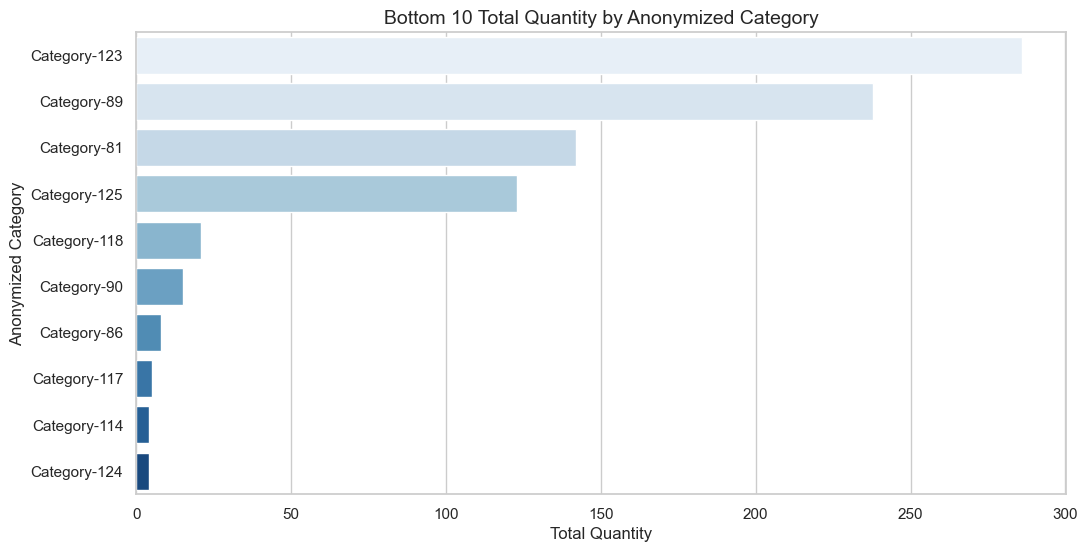

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\1183488345.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


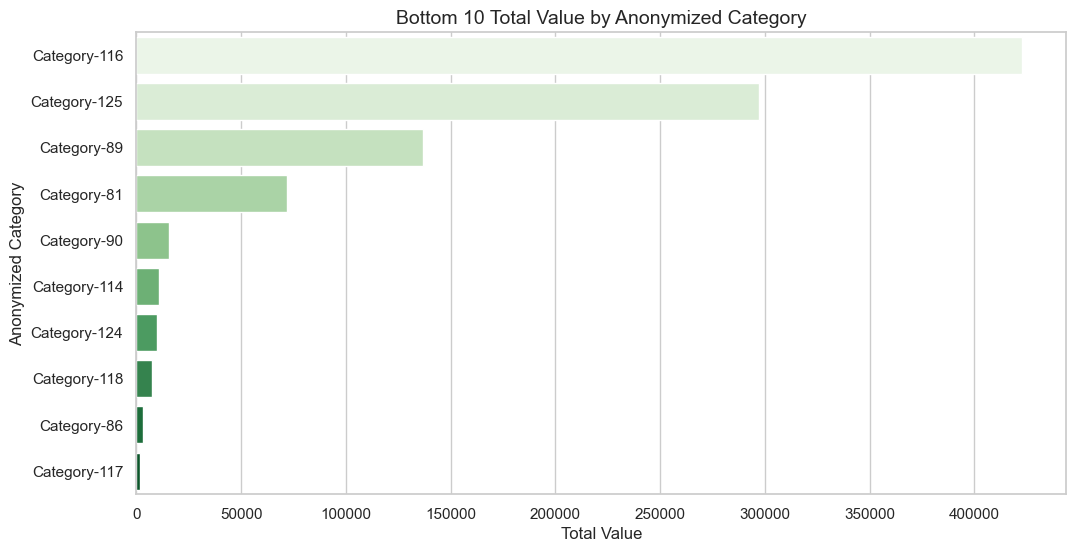

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\1183488345.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


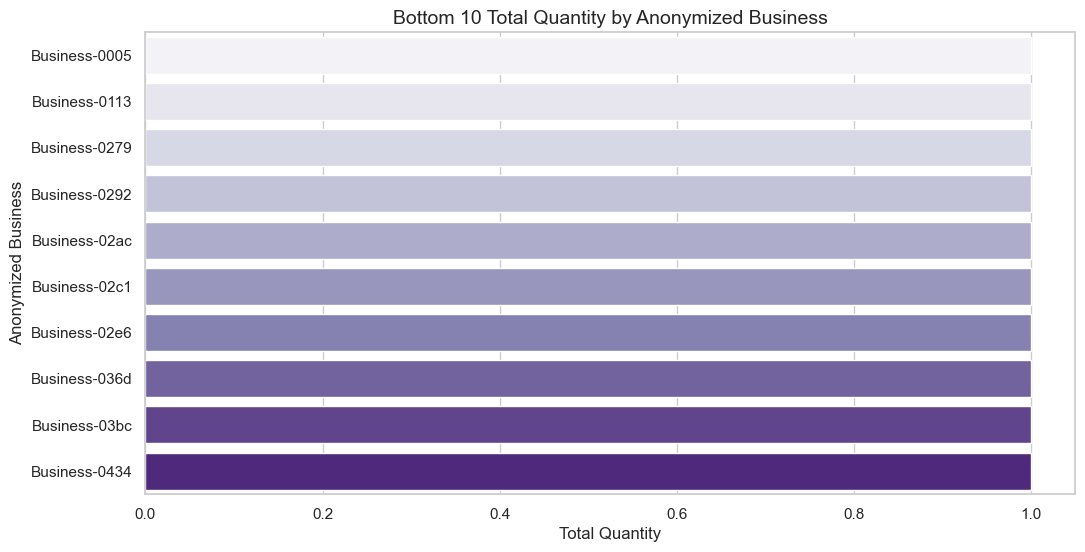

C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\1183488345.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


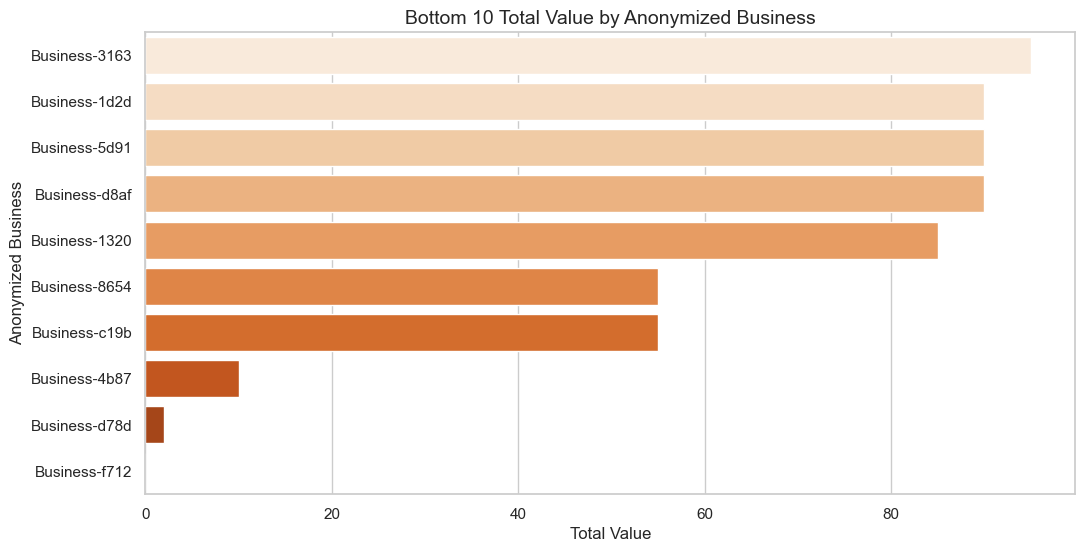

In [17]:
# Define the number of bottom categories/businesses to display
bottom_n = 10

# Filter for bottom categories by Quantity and Value
bottom_categories_quantity = category_sales.nsmallest(bottom_n, 'QUANTITY')
bottom_categories_value = category_sales.nsmallest(bottom_n, 'VALUE')

# Bar chart for Bottom N Total Quantity by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED CATEGORY', 
    data=bottom_categories_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Blues'
)
plt.title(f'Bottom {bottom_n} Total Quantity by Anonymized Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')
plt.show()

# Bar chart for Bottom N Total Value by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED CATEGORY', 
    data=bottom_categories_value.sort_values('VALUE', ascending=False), 
    palette='Greens'
)
plt.title(f'Bottom {bottom_n} Total Value by Anonymized Category', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')
plt.show()

# Filter for bottom businesses by Quantity and Value
bottom_businesses_quantity = business_sales.nsmallest(bottom_n, 'QUANTITY')
bottom_businesses_value = business_sales.nsmallest(bottom_n, 'VALUE')

# Bar chart for Bottom N Total Quantity by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED BUSINESS', 
    data=bottom_businesses_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Purples'
)
plt.title(f'Bottom {bottom_n} Total Quantity by Anonymized Business', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')
plt.show()

# Bar chart for Bottom N Total Value by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED BUSINESS', 
    data=bottom_businesses_value.sort_values('VALUE', ascending=False), 
    palette='Oranges'
)
plt.title(f'Bottom {bottom_n} Total Value by Anonymized Business', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')
plt.show()


## Interpretation of Bottom 10 Categories and Businesses

### Bottom 10 Total Quantity by Anonymized Category
- **Category-124** ranks the lowest in total quantity among the bottom 10, sharing this position with **Category-114** due to a tie.  
- This indicates minimal contribution from these categories, which may require attention to understand potential challenges or limitations in their performance.

---

### Bottom 10 Total Value by Anonymized Category
- **Category-117** ranks last in terms of total value, closely followed by **Category-86**.  
- These categories contribute very little in terms of economic significance, highlighting a potential need for targeted strategies to boost their revenue.

---

### Bottom 10 Total Quantity by Anonymized Business
- Among the bottom 10 businesses, there is a **tie of 1 item**, indicating multiple businesses with equally minimal contributions to the overall sales quantity.  
- These businesses could represent untapped potential or inefficiencies that require deeper analysis.

---

### Bottom 10 Total Value by Anonymized Business
- **Business-f712** has the lowest total value, recording a value of **0**, followed by **Business-d78d**.  
- Businesses with such low contributions may need to be reevaluated for their viability, marketing, or operational strategies.

---

In [18]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE'],
      dtype='object')


Trends Over Time: Analyze sales trends (Value and Quantity) by Month-Year. Create a time series plot to show seasonal patterns or changes in sales performance.

Step 1: Aggregate the data by Month-Year
Calculate the total Quantity and Value for each month, allowing us to observe trends over time.

Step 2: Plot the trends
Create a time series plot that shows both sales value and quantity over time, so we can spot any seasonal patterns or changes in sales performance

In [20]:
df.dtypes

DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
Month-Year                     object
VALUE                         float64
dtype: object

0   2024-08-01
1   2024-08-01
2   2024-08-01
3   2024-08-01
4   2024-08-01
Name: Month-Year, dtype: datetime64[ns]


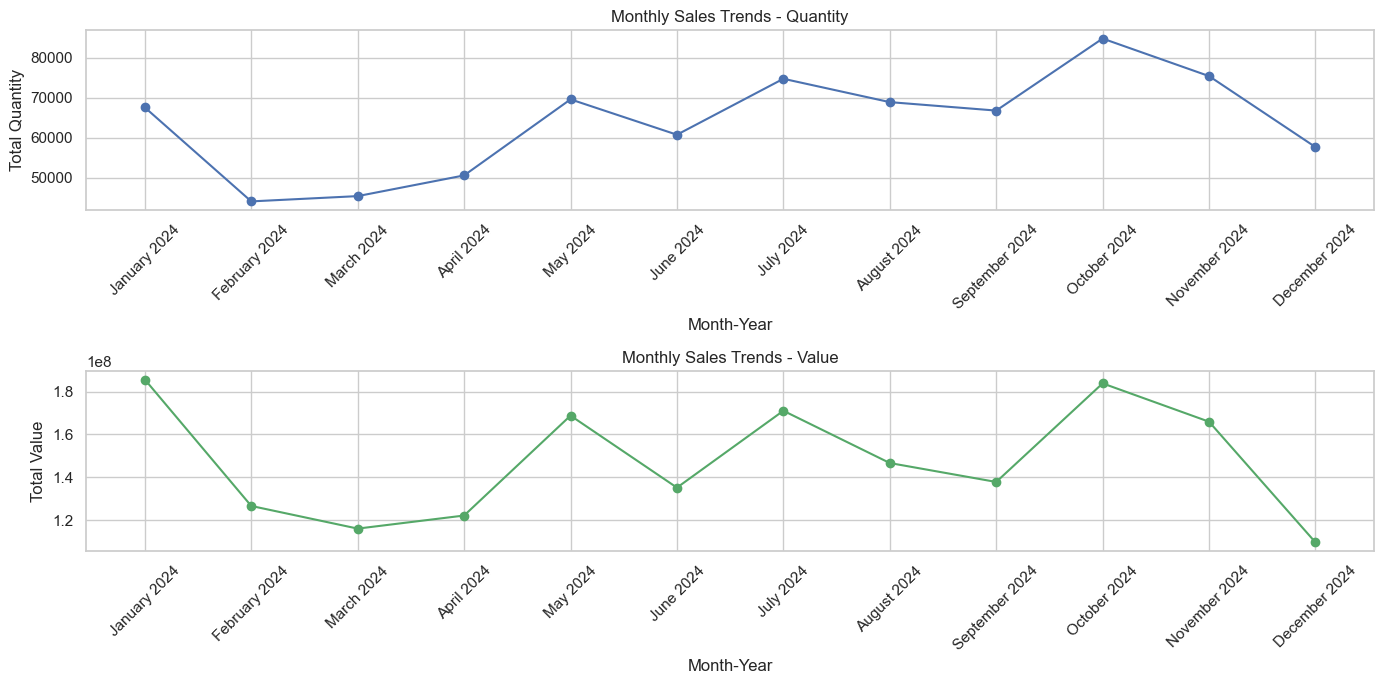

In [26]:
# Convert 'Month-Year' to datetime format if it's not already
df['Month-Year'] = pd.to_datetime(df['Month-Year'], errors='coerce', format='%B %Y')

# Check if the conversion was successful
print(df['Month-Year'].head())

# Create the 'Month-Year-Formatted' column for display in the desired format
df['Month-Year-Formatted'] = df['Month-Year'].dt.strftime('%B %Y')

# Aggregate the data by 'Month-Year'
monthly_sales = df.groupby('Month-Year').agg({'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()

# Add the formatted 'Month-Year-Formatted' column for display
monthly_sales['Month-Year-Formatted'] = monthly_sales['Month-Year'].dt.strftime('%B %Y')

# Sort the data by 'Month-Year' for chronological order
monthly_sales.sort_values('Month-Year', ascending=True, inplace=True)

# Plot the sales trends
plt.figure(figsize=(14, 7))

# Plot Quantity over time
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['Month-Year-Formatted'], monthly_sales['QUANTITY'], marker='o', color='b', label='Quantity')
plt.title('Monthly Sales Trends - Quantity')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

# Plot Value over time
plt.subplot(2, 1, 2)
plt.plot(monthly_sales['Month-Year-Formatted'], monthly_sales['VALUE'], marker='o', color='g', label='Value')
plt.title('Monthly Sales Trends - Value')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Chart 1: Monthly Sales Trends - Quantity

### Overall Trend:
The quantity of sales exhibits a notable drop from January to February, followed by a steady increase until October. There is a sharp decline in both November and December, suggesting possible seasonal trends or external factors impacting sales.

### Key Insights:
- **Lowest Point:** The quantity reaches its lowest in February.
- **Peak:** The highest sales quantity occurs in October.
- **Seasonality:** December shows a significant drop, with values lower than January, indicating a potential seasonal pattern affecting sales.

---

## Chart 2: Monthly Sales Trends - Value

### Overall Trend:
The value of sales mirrors the quantity chart in its overall movement, with a steep drop in February, gradual growth through October, and a sharp decline in the final months of the year, particularly in November and December.

### Key Insights:
- **Lowest Point:** The sales value is lowest in March.
- **Peak:** The highest sales value is observed in October.
- **Seasonality:** The December value is notably lower than January, reinforcing the presence of a strong seasonal influence on sales.

---

## Comparison of Charts

Both charts reveal similar trends: 
1. A **drop** in February
2. **Growth** until October
3. A **sharp decline** in November and December.

### Key Takeaways:
- **Relationship between Quantity and Value:** The quantity and value of sales are closely aligned, indicating that higher quantities tend to correlate with higher value sales.
- **Volatility:** The sales value chart exhibits more volatility compared to the quantity chart, showing larger fluctuations in values. This suggests that the pricing or product mix may have contributed to larger variations in sales value.


## Performance Analysis:

To identify the top 5 most frequently purchased products (based on Quantity) and the top 5 most valuable products (based on Value), group the data by ANONYMIZED PRODUCT and then sum the QUANTITY and VALUE columns. After that, sort the results to get the top 5 for each criterion.

In [19]:
# Group by 'ANONYMIZED PRODUCT' and calculate total Quantity and Value
product_sales = df.groupby('ANONYMIZED PRODUCT').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum')
).reset_index()

# Get top 5 products by Quantity (most frequently purchased)
top_5_quantity = product_sales.sort_values(by='Total_Quantity', ascending=False).head(5)

# Get top 5 products by Value (most valuable products)
top_5_value = product_sales.sort_values(by='Total_Value', ascending=False).head(5)

# Display the results
print("Top 5 Most Frequently Purchased Products (Based on Quantity):")
print(top_5_quantity)

print("\nTop 5 Most Valuable Products (Based on Value):")
print(top_5_value)


Top 5 Most Frequently Purchased Products (Based on Quantity):
    ANONYMIZED PRODUCT  Total_Quantity  Total_Value
339       Product-66e0           46957   70704225.0
753       Product-e805           42602  262787281.0
477       Product-8f75           37566  158797460.0
128       Product-29ee           35940   68248274.0
214       Product-4156           28487   56956007.0

Top 5 Most Valuable Products (Based on Value):
    ANONYMIZED PRODUCT  Total_Quantity  Total_Value
753       Product-e805           42602  262787281.0
477       Product-8f75           37566  158797460.0
339       Product-66e0           46957   70704225.0
128       Product-29ee           35940   68248274.0
214       Product-4156           28487   56956007.0


### Key Observations:
- **Product-e805** emerges as the most valuable product, suggesting that it could be a premium product with a higher price per unit, contributing to its higher total value.
- While **Product-66e0** ranks first in quantity, it falls to third in terms of value, possibly due to lower pricing or less profit margin.
- The other products follow a similar trend, where the most frequently purchased items (in terms of quantity) may not necessarily be the most valuable, indicating varying price points or market strategies.


# **Section 3: Advanced Analysis (30 points)**

### Step 1: Data Preparation
To perform customer segmentation based on purchasing behavior, aggregate the data based on the ANONYMIZED BUSINESS column and calculate the following metrics:
- **Total Quantity Purchased**: Sum of quantities for each business.
- **Total Value Contributed**: Sum of the value for each business.
- **Frequency of Transactions**: Count of unique dates (or entries) for each business, which represents how frequently they make purchases.

### Step 2: Calculating Segmentation Metrics
We'll calculate:
- **Total Quantity Purchased**: This will be the sum of quantities for each business.
- **Total Value Contributed**: This will be the sum of the value for each business.
- **Frequency of Transactions**: This will be the count of unique dates or entries for each business, representing how often they make purchases.

### Step 3: Segmentation Strategy
We will classify the businesses into 3 groups:
1. **High Value**: Businesses with high total value and total quantity.
2. **Medium Value**: Businesses with moderate total value and quantity.
3. **Low Value**: Businesses with low total value and quantity.

### Step 4: Segmentation Model
Use thresholds (quantiles, for example) to classify the businesses into the above segments. The thresholds will be based on the total value and total quantity, and businesses will be classified accordingly.


In [20]:
# Grouping by 'ANONYMIZED BUSINESS' and calculating total quantity, value, and frequency
business_segmentation = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('VALUE', 'sum'),
    Frequency=('DATE', 'nunique')
).reset_index()

# Define thresholds for segmentation based on Total Value and Total Quantity
high_value_threshold = business_segmentation['Total_Value'].quantile(0.75)
medium_value_threshold = business_segmentation['Total_Value'].quantile(0.50)

high_quantity_threshold = business_segmentation['Total_Quantity'].quantile(0.75)
medium_quantity_threshold = business_segmentation['Total_Quantity'].quantile(0.50)

# Create a new column 'Segment' to classify the businesses
def classify_business(row):
    if row['Total_Value'] >= high_value_threshold and row['Total_Quantity'] >= high_quantity_threshold:
        return 'High Value'
    elif row['Total_Value'] >= medium_value_threshold and row['Total_Quantity'] >= medium_quantity_threshold:
        return 'Medium Value'
    else:
        return 'Low Value'

business_segmentation['Segment'] = business_segmentation.apply(classify_business, axis=1)

# Display the segmented data
segment = business_segmentation[['ANONYMIZED BUSINESS', 'Total_Quantity', 'Total_Value', 'Frequency', 'Segment']]
print(segment.head())


  ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency       Segment
0       Business-0000               8      10445.0          5     Low Value
1       Business-0005               1       2645.0          1     Low Value
2       Business-0029              26      77340.0          4  Medium Value
3       Business-003d              98     221761.0         16  Medium Value
4       Business-0072             127     225056.0         54  Medium Value


Create three separate DataFrames for each segment:

In [21]:
# Separate the data into three segments based on 'Segment' column
high_value = segment[segment['Segment'] == 'High Value']
medium_value = segment[segment['Segment'] == 'Medium Value']
low_value = segment[segment['Segment'] == 'Low Value']

# Display the segmented data
print("High Value Segment:")
print(high_value.head())

print("\nMedium Value Segment:")
print(medium_value.head())

print("\nLow Value Segment:")
print(low_value.head())


High Value Segment:
   ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency     Segment
5        Business-0078             317    1056525.0        159  High Value
14       Business-00fa             180     334250.0          4  High Value
16       Business-0109             279    1006802.0         49  High Value
19       Business-013f             136     292275.0         38  High Value
23       Business-016c             492     923462.0        154  High Value

Medium Value Segment:
   ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency       Segment
2        Business-0029              26      77340.0          4  Medium Value
3        Business-003d              98     221761.0         16  Medium Value
4        Business-0072             127     225056.0         54  Medium Value
12       Business-00e7              29      85643.0          5  Medium Value
15       Business-0105              41      88285.0         11  Medium Value

Low Value Segment:
  ANONYMIZED BUSINESS  To

### Step 5: Recommendations

After segmenting businesses, recommendations for engagement with each group are:

#### High Value:
- Focus on maintaining relationships and offering loyalty programs or exclusive deals.
- Offer personalized services or premium products to strengthen the partnership.

#### Medium Value:
- Offer targeted promotions and incentives to increase their purchasing volume and value.
- Provide special offers for volume-based discounts to move them into the high-value category.

#### Low Value:
- Identify the reasons behind lower engagement, such as budget constraints or less frequent purchases.
- Offer entry-level products, discounts, or incentives to encourage more frequent purchases.


Forecasting: Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

# **Proceed with an ARIMA model for forecasting total sales (Value).**

In [22]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE'],
      dtype='object')

Step 1: Check for Stationarity

First, Check whether the sales value data is stationary by using the Augmented Dickey-Fuller (ADF) Test. If the series is not stationary, perform differencing to make it stationary.

In [29]:
# Perform the ADF test on the 'Value' column
result = adfuller(df['VALUE'])

# Print ADF test results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation of the results
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is required.")


ADF Statistic: -241.668125103738
p-value: 0.0
The series is stationary.


As the series is stationary, no differencing is required, proceed fitting the seasonal arima mode4l

# **Step 2: Fit the Seasonal ARIMA Model**

We need to identify the optimal parameters (p, d, q) for the ARIMA model and the seasonal parameters (P, D, Q, m), where:

- p: the number of lag observations in the model (AR term)
- d: the number of times that the raw observations are differenced (I term)
- q: the size of the moving average window (MA term)
- P, D, Q, m: seasonal components of the model (Seasonal AR, Seasonal MA, seasonal differencing, and number of periods in each season)

c:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HomePC\AppData\Local\Temp\ipykernel_26544\986248533.py:18: FutureWarning

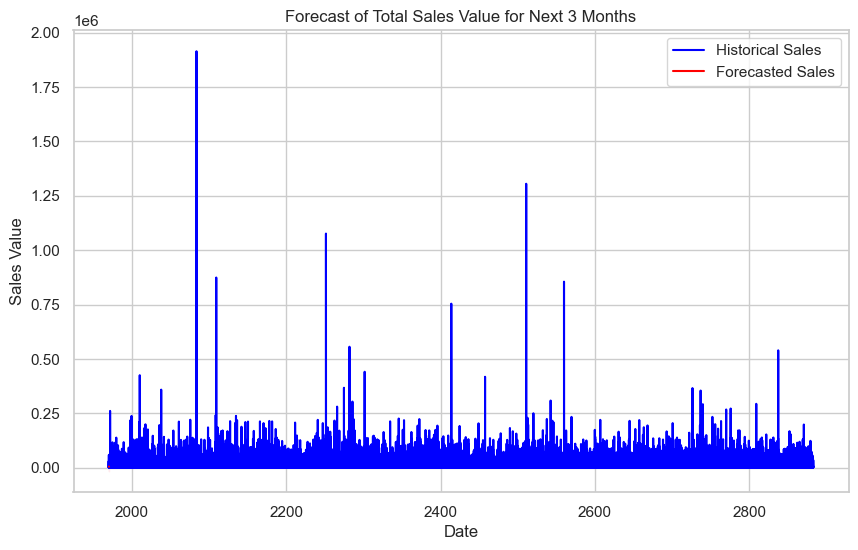

In [31]:


# Set the seasonal parameters and ARIMA order (p, d, q)
p, d, q = 1, 0, 1  # ARIMA order
P, D, Q, m = 1, 1, 1, 12  # Seasonal ARIMA order with yearly seasonality (12 months)

# Fit the SARIMA model
model = SARIMAX(df['VALUE'], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_model = model.fit(disp=False)

# Forecast for the next 3 months
forecast_steps = 3
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['VALUE'], label='Historical Sales', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], 
                 forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Total Sales Value for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()
plt.show()
